***Consider an HR department trying to hire someone and they are trying to predict previous salary of an employer.***
- The Model will predict a salary based on the position of the employee in their previous role

- Consider the data [Position_Salary.csv](Position_Salaries.csv)

- Note that with SVR you need to apply feature scaling because the SVR model does not have the explicit linear equations with coefficients that standardise / compensate for the differences between the lower value features and higher value features
-SVR has an implicit equation / relationship of dependent variables with respect to features hence why feature scaling is required.

***Import Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Importing the dataset***

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print(f'{x}\n{y}')

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


***Feature Scaling***
- This is a required step because the salaries are way higher than the levels Feature
- This is required to put the values in the same range
**Other Instances where feature scaling is necessary**
- Don't apply feature scaling to dummy variables resulting from OneHotEncoding
- When a dependent variable takes binary values e.g. 0,1 you do not have to apply feature scaling because the values are in the right range
- When the dependent variable takes super high values with respect to the other values then you need to apply feature scaling to put all the features and dependent variables in the same range
- Feature scaling must be applied to data after the split if data is split into training and test sets
- Finally you might need to inverse feature scaling at the end to revert to the original scales when explaining results

In [4]:
print(f'{x}\n{y}')

#reshape y into a 2d array because the StandardScalar class which performs the scaling expects a 2D array
y = y.reshape(len(y), 1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [5]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x= sc_x.fit_transform(x)

# create a separate StandardScalar object dependent feature as we cannot use the same object we used on the independent variables
#this is because the sc object computes the mean and standard deviation of the dependent features and since both features are different
#a different StandardScalar object is required
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(f'{x}\n{y}')

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


***Training the SVR Model on the whole Data***

***A Parameter / Kernel has to be passed to the SVR Model - examples of such Kernels are shown below***
- Polynomial Kernel - for non linear data
- Gaussian Kernel - with the classic Gaussian function
- Gaussian Radial Basis Function (RBF) - most commonly used
- Laplace RBF Kernel
- Hyperbolic Tangent Kernel
- Sigmold kernel
- Bessel Function of First Kind Kernel
- Anova Radial Basis Kernel
- Linear spline kernel in 1D


In [6]:
from sklearn.svm import SVR
#we must input parameters
regressor = SVR(kernel='rbf')
#train the regressor
regressor.fit(x,y)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

***Predicting a new result***

In [8]:
#must apply reverse scaling i.e. inverse_transform to y and use the scaled version of x i.e. sc_x
# add a reshape to avoid format error
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

***Visualising the SVR results***

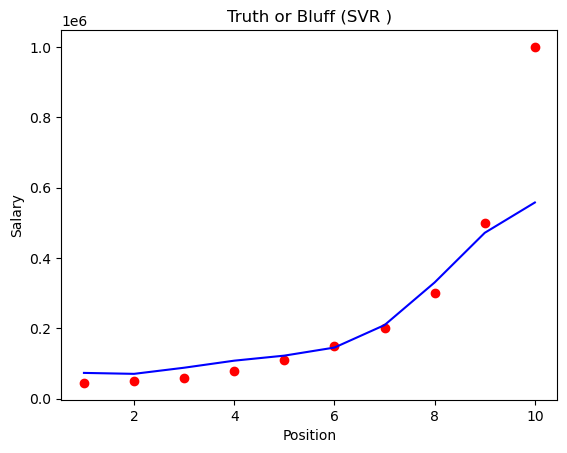

In [9]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red') # reverse the input features
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color="blue")#note that predicted x is not transformed again
plt.title ('Truth or Bluff (SVR )')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

***Visualising the SVR Results (for higher resolution and smoother curve)***

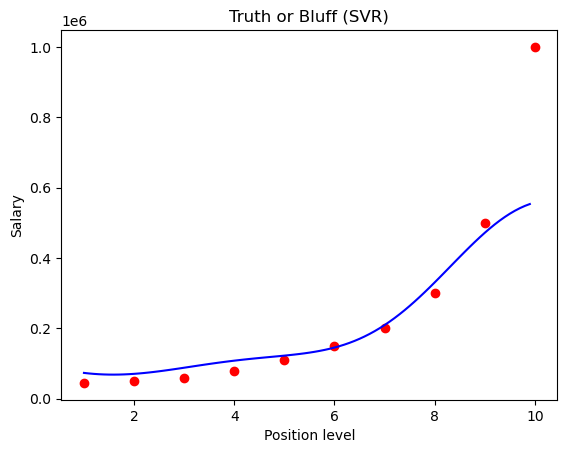

In [11]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()